In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Base_Umbilo.csv', sep=';',decimal=',')
df.set_index('Dia', inplace=True)

df

Q_entrada  NH_entrada  TSS_entrada  DQO_entrada  DBO_entrada  \
Dia                                                                          
0.000000    4719.000000   21.000000   271.000000   391.000000   198.575000   
0.041667    4766.833372   21.041667   271.208333   391.375000   198.761875   
0.083333    4814.666743   21.083333   271.416667   391.750001   198.948750   
0.125000    4862.500115   21.125000   271.625000   392.125001   199.135625   
0.166667    4910.333486   21.166667   271.833334   392.500001   199.322501   
...                 ...         ...          ...          ...          ...   
364.833625  2891.467657   17.166375   173.332750   246.831874   126.034431   
364.875292  2767.884225   17.124708   173.249416   246.623540   125.953181   
364.916959  2644.300792   17.083041   173.166083   246.415207   125.871931   
364.958625  2520.717360   17.041375   173.082749   246.206873   125.790681   
365.000000  2334.275029   16.978515   172.957030   245.892574   125.668104   

            TN_entrada  TKN_entrada  TP_entrada  PO_entrada      Q_saida  \
Dia                                                                        
0.000000     34.060000    34.060000    8.020000         4.6  6135.066621   
0.041667     34.114167    34.114167    8.023333         4.6  4536.546366   
0.083333     34.168333    34.168333    8.026667         4.6  4584.379743   
0.125000     34.222500    34.222500    8.030000         4.6  4632.213115   
0.166667     34.276667    34.276667    8.033333         4.6  4680.046486   
...                ...          ...         ...         ...          ...   
364.833625   25.411331    25.411331    6.756655         4.6  2662.209157   
364.875292   25.363414    25.363414    6.754988         4.6  2538.625725   
364.916959   25.315498    25.315498    6.753322         4.6  2415.042292   
364.958625   25.267581    25.267581    6.751655         4.6  2291.458860   
365.000000   25.195292    25.195292    6.749141         4.6  2105.016529   

            NH_saida   NO_saida  TSS_saida  DQO_saida  DBO_saida   TN_saida  \
Dia                                                                           
0.000000    3.854908   0.079306   6.642565  83.782370   3.890641   5.042310   
0.041667    3.110403   0.235010   6.475226  81.485161   3.157472   4.427449   
0.083333    2.429280   0.285368   6.328465  80.156342   3.032321   3.777312   
0.125000    1.858492   0.298568   6.245022  78.986079   2.977202   3.204324   
0.166667    1.417633   0.298687   6.193657  77.894845   2.946727   2.750241   
...              ...        ...        ...        ...        ...        ...   
364.833625  0.117794  18.804470   3.245100  33.145931   1.527409  19.358707   
364.875292  0.114032  18.859135   3.270412  33.142325   1.527662  19.410103   
364.916959  0.110285  18.915739   3.302093  33.144707   1.529204  19.463677   
364.958625  0.106555  18.974251   3.341246  33.153967   1.532223  19.519437   
365.000000  0.100947  19.066666   3.417396  33.183656   1.540150  19.608314   

            TKN_saida  TP_saida  PO_saida  
Dia                                        
0.000000     4.963005  0.428499  0.326124  
0.041667     4.192439  0.671496  0.573663  
0.083333     3.491944  1.125122  1.029731  
0.125000     2.905757  1.626430  1.532398  
0.166667     2.451555  2.150652  2.057467  
...               ...       ...       ...  
364.833625   0.554237  5.624398  5.579316  
364.875292   0.550968  5.688779  5.643467  
364.916959   0.547938  5.754875  5.709267  
364.958625   0.545186  5.822656  5.776672  
365.000000   0.541648  5.928673  5.881943  

[8761 rows x 19 columns]

In [3]:
y = df['DQO_saida']
X = df.drop(['DQO_saida',
            'Q_saida',
            'NH_saida',
            'NO_saida',
            'TSS_saida',
            'DBO_saida',
            'TN_saida',
            'TKN_saida',
            'TP_saida',
            'PO_saida',
            'DBO_entrada',
            'DQO_entrada',
            'TKN_entrada',
            'TP_entrada',
            'PO_entrada'], axis=1)

print("X", X.shape)
print("y", y.shape)

X (8761, 4)
y (8761,)


In [4]:
seed = 42

# separando treino e teste
X_training, X_test, y_training, y_test = train_test_split(X, y, shuffle=False, test_size=0.082) 
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (719, 4)
Test set y (719,)


In [5]:
# Padronização (Standardization) para o y
# Sempre usar os dados de treino apenas para construir o modelo, então transformar o teste com base no treino (como se o teste fossem dados novos)
y_train = np.array(y_training).reshape(len(y_training),1)
y_testing = np.array(y_test).reshape(len(y_test),1)

scalery = StandardScaler().fit(y_train)
normalized_y_train = pd.DataFrame(
    scalery.transform(y_train),
    columns = [y_training.name],
    index = y_training.index
)
normalized_y_train = normalized_y_train.squeeze()

normalized_y_test = pd.DataFrame(
    scalery.transform(y_testing),
    columns = [y_test.name],
    index = y_test.index
)
normalized_y_test = normalized_y_test.squeeze()


# Padronização dos previsores (DataFrame X)
scalerX = StandardScaler().fit(X_training)

normalized_x_train = pd.DataFrame(
    scalerX.transform(X_training),
    columns = X_training.columns,
    index = X_training.index
)


normalized_x_test = pd.DataFrame(
    scalerX.transform(X_test),
    columns = X_test.columns,
    index = X_test.index
)

In [6]:
# Random Forest com validação cruzada e Grid Search

# definindo os valores possíveis dos parâmetros a serem testados
params = {'n_estimators': [500], # 1,3,5,10,100,200,400,500
          'max_depth': [5], # 2,3,5,10,15,20
          'criterion': ['absolute_error']   # 'poisson','squared_error',
          }

# criando o objeto do modelo com RandomForestRegressor
rf_model_cv_gs = RandomForestRegressor(random_state = seed)

# criando o objeto do grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, param_grid=params, return_train_score=True, scoring='neg_mean_absolute_percentage_error') #neg_root_mean_squared_error

# treinando o modelo com o grid search
grid_search.fit(normalized_x_train, normalized_y_train)

# pegando os resultados da validação cruzada (cv_results)
cv_results = pd.DataFrame(grid_search.cv_results_)

# pegando e imprimindo a melhor combinação de hiperparâmetros
cv_best_params = grid_search.best_params_
print('\n Best hyperparameters:')
print(cv_best_params)



 Best hyperparameters:
{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 500}


In [7]:
# imprimindo o score médio nas bases de treino
print("Average accuracy on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0])) 
# imprimindo o score médio nas bases de validação
print("Average accuracy on test set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

# configurando o modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.set_params(n_estimators = cv_best_params['n_estimators'],
                        max_depth = cv_best_params['max_depth'],
                        )

# treinando um modelo com a melhor combinação de hiperparâmetros
rf_model_cv_gs.fit(normalized_x_train, normalized_y_train)
best_model_params = rf_model_cv_gs.get_params()

Average accuracy on train set: -1.623 +/- 0.136
Average accuracy on test set: -2.131 +/- 1.352


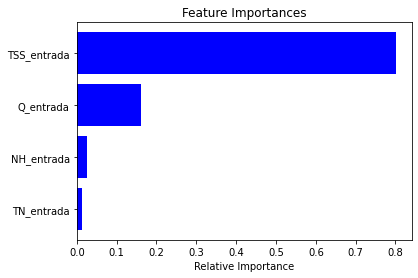

In [8]:
# desenhando o gráfico de impoartância de variáveis
features = normalized_x_train.columns
importances = rf_model_cv_gs.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({'features': features,
                                       'importances': importances})

plt.title('Feature Importances')
plt.barh(range(len(importances[indices][-16:])), importances[indices][-16:], color='b', align='center')
plt.yticks(range(len(importances[indices][-16:])), [features[i] for i in indices[-16:]])
plt.xlabel('Relative Importance')
plt.show()

In [9]:
# Informações úteis sobre o melhor modelo
# print(importances)
# print(indices)
# print(importances[indices][-16:])
# print(sum(importances))

# Feature importance em DataFrame para ser mais consumível
df_importances = pd.DataFrame({'feature': features, 'importances': importances})
df_importances.sort_values(by='importances', ascending=False)

feature  importances
2  TSS_entrada     0.800508
0    Q_entrada     0.160746
1   NH_entrada     0.025546
3   TN_entrada     0.013199

In [10]:
# Cross-validation para averiguar precisão do modelo na base de treino
print('---------Treino---------')
results = cross_val_score(rf_model_cv_gs,X=normalized_x_train,y=normalized_y_train,cv=KFold(n_splits=10), scoring='neg_mean_absolute_percentage_error')*(-1)
print(results)
print('Média: {}\nStd: {}'.format(round(results.mean(),4),round(results.std(),4)))
print('---------Total---------')
# Predição analisada por validação cruzada para o dataset inteiro
results_total = cross_val_score(rf_model_cv_gs,X=X,y=y,cv=KFold(n_splits=10), scoring='neg_mean_absolute_percentage_error')*(-1)
print(results_total)
print('Média: {}\nStd: {}'.format(round(results_total.mean(),4),round(results_total.std(),4)))

---------Treino---------
[2.14371799 1.44143518 2.39878195 2.32232829 2.66250195 2.98233473
 3.18157267 1.11534573 1.18084629 1.26316635]
Média: 2.0692
Std: 0.731
---------Total---------
[0.12662273 0.12684433 0.16599922 0.17710456 0.13177143 0.16436805
 0.10497199 0.13683668 0.12153284 0.24061252]
Média: 0.1497
Std: 0.0372


In [11]:
# Realizando a predição no teste
y_test_pred_rf = rf_model_cv_gs.predict(normalized_x_test)

# Desnormalização
y_test_pred_rf = np.array(y_test_pred_rf).reshape(len(y_test_pred_rf),1)
y_test_pred_rf = scalery.inverse_transform(y_test_pred_rf)
y_test_pred_rf = pd.DataFrame(y_test_pred_rf, columns=[normalized_y_test.name], index = normalized_y_test.index)
y_test_pred_rf = y_test_pred_rf.squeeze()

y_test_pred_rf

# Análise dos erros das previsões
rmse_test_rf = math.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)


df_metricas = pd.DataFrame(data={'RSME':[rmse_test_rf], 'MAE':[mae_test_rf], 'MAPE':[mape_test_rf],'R²':[r2_test_rf]})
df_metricas

RSME        MAE      MAPE        R²
0  17.767199  12.276342  0.263778  0.640245

In [12]:
# Preparação do DataFrame comparativo entre a previsão e o valor real, indexado pelo dia

df_comparacao = pd.concat([y_test,y_test_pred_rf],axis=1)
df_comparacao.columns = ['Valor_Real','Valor_Predito']
df_comparacao['Diferenca_percentual'] = 100*(df_comparacao['Valor_Predito'] - df_comparacao['Valor_Real'])/df_comparacao['Valor_Real']
df_comparacao.sort_index(inplace=True)
df_comparacao

Valor_Real  Valor_Predito  Diferenca_percentual
Dia                                                        
335.083601   82.855864      81.691985             -1.404703
335.125268   82.498896      81.737298             -0.923161
335.166935   82.205463      81.750305             -0.553683
335.208602   81.972441      81.756005             -0.264035
335.250268   81.797515      81.780867             -0.020352
...                ...            ...                   ...
364.833625   33.145931      76.869177            131.911352
364.875292   33.142325      76.869177            131.936589
364.916959   33.144707      76.869177            131.919920
364.958625   33.153967      76.869177            131.855142
365.000000   33.183656      76.869177            131.647702

[719 rows x 3 columns]

        RSME        MAE      MAPE        R²
0  17.767199  12.276342  0.263778  0.640245


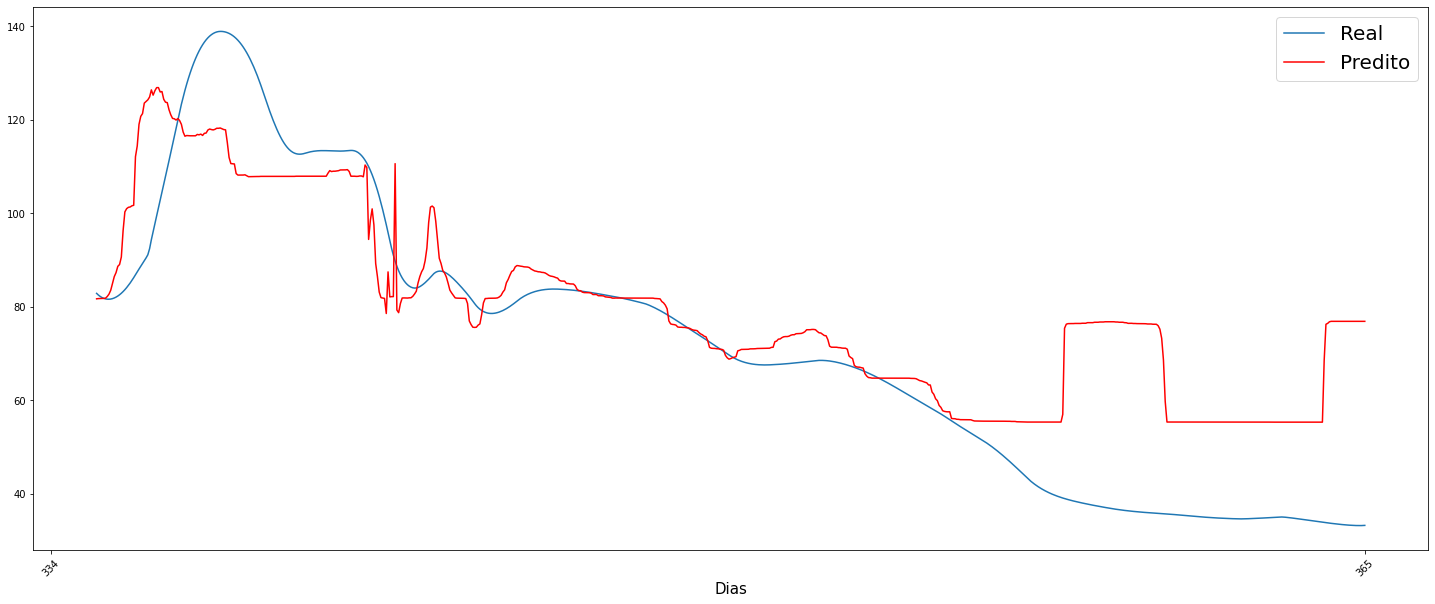

In [13]:
print(df_metricas)
import matplotlib.dates as mdates
# Visualização gráfica das predições comparadas aos valores reais
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.plot(df_comparacao.index, df_comparacao['Valor_Real'], label = 'Real')
plt.plot(df_comparacao.index, df_comparacao['Valor_Predito'], label = 'Predito', c='r')
plt.legend(fontsize=20)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

In [14]:
df_comparacao.to_csv("1_1-Previsoes_RF.csv",encoding='utf-8-sig',sep=';',decimal=',')

# Previsão na base de treino

        RSME        MAE      MAPE        R²
0  17.723591  11.435934  0.111963  0.792236


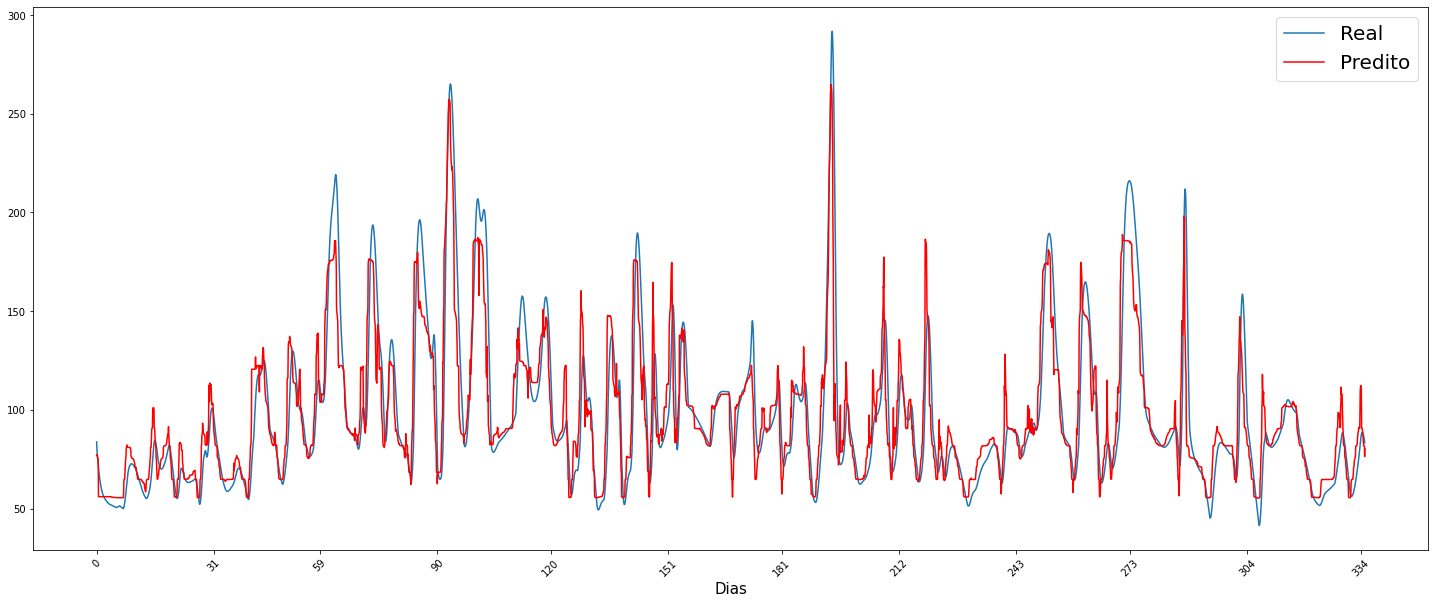

In [15]:
# Realizando a predição no traine
y_train_pred_rf = rf_model_cv_gs.predict(normalized_x_train)

# Desnormalização
y_train_pred_rf = np.array(y_train_pred_rf).reshape(len(y_train_pred_rf),1)
y_train_pred_rf = scalery.inverse_transform(y_train_pred_rf)
y_train_pred_rf = pd.DataFrame(y_train_pred_rf, columns=[normalized_y_train.name], index = normalized_y_train.index)
y_train_pred_rf = y_train_pred_rf.squeeze()

y_train_pred_rf


# Análise dos erros das previsões
rmse_train_rf = math.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Preparação do DataFrame comparativo entre a previsão e o valor real, indexado pelo dia
df_train_comparacao = pd.concat([y_training,y_train_pred_rf],axis=1)
df_train_comparacao.columns = ['Valor_Real','Valor_Predito']
df_train_comparacao['Diferenca_percentual'] = 100*(df_train_comparacao['Valor_Predito'] - df_train_comparacao['Valor_Real'])/df_train_comparacao['Valor_Real']
df_train_comparacao.sort_index(inplace=True)
df_train_comparacao


df_train_metricas = pd.DataFrame(data={'RSME':[rmse_train_rf], 'MAE':[mae_train_rf], 'MAPE':[mape_train_rf],'R²':[r2_train_rf]})
print(df_train_metricas)

# Visualização gráfica das predições comparadas aos valores reais
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.plot(df_train_comparacao.index, df_train_comparacao['Valor_Real'], label = 'Real')
plt.plot(df_train_comparacao.index, df_train_comparacao['Valor_Predito'], label = 'Predito', c='r')
plt.legend(fontsize=20)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

In [16]:
# Gráfico de cima, queremos os dados só para o melhor modelo (base de treino)
df_train_comparacao.to_csv('2_1-Previsoes_TREINO_RF.csv',sep=';',decimal=',',encoding='utf-8-sig')

# FEATURE IMPORTANCE

## PDPs and Permutation Importance

In [17]:
print(normalized_x_train.min())
print(normalized_x_train.max())

Q_entrada     -2.942186
NH_entrada    -2.846533
TSS_entrada   -2.767711
TN_entrada    -2.842474
dtype: float64
Q_entrada      3.060924
NH_entrada     7.473228
TSS_entrada    5.131490
TN_entrada     4.794257
dtype: float64


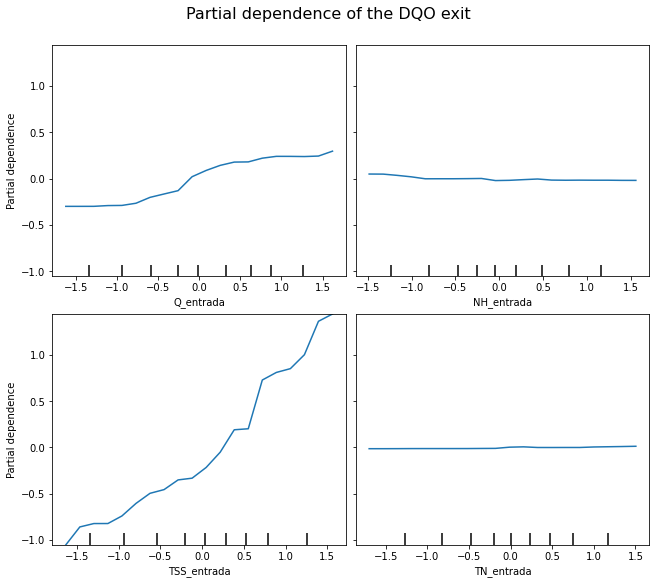

In [18]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

# print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": X_training.columns,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    # "categorical_features": categorical_features,
}

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    rf_model_cv_gs,
    normalized_x_train,
    **features_info,
    ax=ax,
    **common_params,
)

_ = display.figure_.suptitle(
    "Partial dependence of the DQO exit\n",
    fontsize=16,
)

Tree-based models provide an alternative measure of feature importances based on the mean decrease in impurity (MDI). Impurity is quantified by the splitting criterion of the decision trees (Gini, Log Loss or Mean Squared Error). However, this method can give high importance to features that may not be predictive on unseen data when the model is overfitting. Permutation-based feature importance, on the other hand, avoids this issue, since it can be computed on unseen data.Furthermore, impurity-based feature importance for trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories.
Permutation-based feature importances do not exhibit such a bias. Additionally, the permutation feature importance may be computed performance metric on the model predictions and can be used to analyze any model class (not just tree-based models).

Importance_mean  Importance_std  Importance_mean_normalized
TSS_entrada         1.401443        0.022238                    0.789330
Q_entrada           0.327207        0.010799                    0.184292
NH_entrada          0.037738        0.002010                    0.021255
TN_entrada          0.009097        0.000641                    0.005124

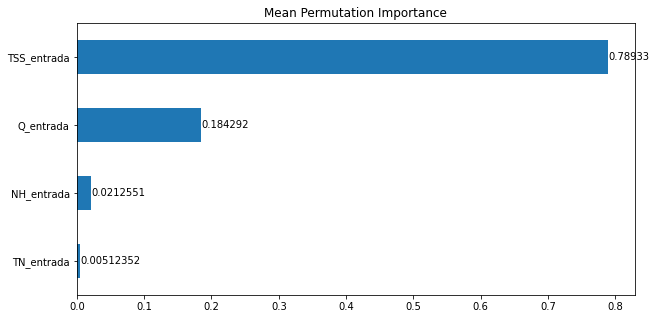

In [19]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf_model_cv_gs, normalized_x_train, normalized_y_train,
                           n_repeats=30,
                           random_state=0)
# r.importances_mean
# r.importances_std

df_permutation_importance = pd.DataFrame(
    data={'Importance_mean': r.importances_mean,
          'Importance_std': r.importances_std},
    index=normalized_x_train.columns
)

df_permutation_importance['Importance_mean_normalized'] = df_permutation_importance['Importance_mean']/df_permutation_importance['Importance_mean'].sum()

df_permutation_importance = df_permutation_importance.sort_values('Importance_mean',ascending=False)

ax = df_permutation_importance['Importance_mean_normalized'].sort_values(ascending=True).plot.barh(figsize=(10,5), title='Mean Permutation Importance')
ax.bar_label(ax.containers[0])

df_permutation_importance

In [20]:
df_permutation_importance.to_csv('3_1-Permutation_Importance_RF.csv',sep=';',decimal=',',encoding='utf-8-sig')

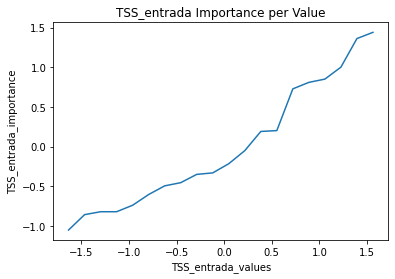

DBO_entrada_importance  Q_entrada_importance  Q_entrada_values  \
0                -0.299997             -0.299997         -1.624177   
1                -0.299970             -0.299970         -1.453397   
2                -0.299749             -0.299749         -1.282618   
3                -0.291545             -0.291545         -1.111839   
4                -0.289882             -0.289882         -0.941059   
5                -0.266361             -0.266361         -0.770280   
6                -0.202894             -0.202894         -0.599501   
7                -0.166362             -0.166362         -0.428721   
8                -0.130422             -0.130422         -0.257942   
9                 0.020517              0.020517         -0.087163   
10                0.088132              0.088132          0.083616   
11                0.142926              0.142926          0.254396   
12                0.178364              0.178364          0.425175   
13                0.180373              0.180373          0.595954   
14                0.220708              0.220708          0.766734   
15                0.240439              0.240439          0.937513   
16                0.240136              0.240136          1.108292   
17                0.238289              0.238289          1.279072   
18                0.243537              0.243537          1.449851   
19                0.296407              0.296407          1.620630   

    NH_entrada_importance  NH_entrada_values  TSS_entrada_importance  \
0                0.049234          -1.484610               -1.053620   
1                0.048349          -1.324545               -0.859660   
2                0.034863          -1.164480               -0.822983   
3                0.019119          -1.004414               -0.822771   
4               -0.002040          -0.844349               -0.740820   
5               -0.001718          -0.684284               -0.605545   
6               -0.001693          -0.524219               -0.496253   
7               -0.000505          -0.364154               -0.456174   
8                0.001381          -0.204088               -0.351381   
9               -0.021344          -0.044023               -0.332633   
10              -0.018633           0.116042               -0.216812   
11              -0.011208           0.276107               -0.051841   
12              -0.004470           0.436172                0.190328   
13              -0.016136           0.596238                0.201413   
14              -0.017754           0.756303                0.728069   
15              -0.016748           0.916368                0.810008   
16              -0.017462           1.076433                0.851067   
17              -0.017468           1.236498                1.001817   
18              -0.019063           1.396563                1.362789   
19              -0.019383           1.556629                1.441528   

    TSS_entrada_values  
0            -1.634561  
1            -1.466265  
2            -1.297970  
3            -1.129674  
4            -0.961378  
5            -0.793082  
6            -0.624787  
7            -0.456491  
8            -0.288195  
9            -0.119899  
10            0.048396  
11            0.216692  
12            0.384988  
13            0.553284  
14            0.721579  
15            0.889875  
16            1.058171  
17            1.226467  
18            1.394762  
19            1.563058

In [21]:
dict_data = {}
df_pdp = pd.DataFrame(display.pd_results[0]['average'].flatten(),columns=['DBO_entrada_importance'])
for i in range(len(display.pd_results)):
    if i!=3 and i!=8: # para o NO, que não tem FI, não temos os 20 dados para plotar
        dict_data[f"{X.columns[i]}_importance"] = display.pd_results[i]['average']
        dict_data[f"{X.columns[i]}_values"]  = display.pd_results[i]['values']
        # df_pdp[f"{X.columns[i]}_importance"] = dict_data[f"{X.columns[i]}_importance"].flatten()
        df_pdp[f"{X.columns[i]}_importance"] = display.pd_results[i]['average'][0]
        df_pdp[f"{X.columns[i]}_values"] = display.pd_results[i]['values'][0]


plt.plot(df_pdp.loc[:, 'TSS_entrada_values'], df_pdp.loc[:, 'TSS_entrada_importance'])
plt.xlabel('TSS_entrada_values')
plt.ylabel('TSS_entrada_importance')
plt.title('TSS_entrada Importance per Value')
plt.show()


df_pdp.to_csv('4_1-PDPs_RF.csv',encoding='utf-8-sig',decimal=',',sep=';')
df_pdp

In [22]:
# Avaliando na base de TESTE o impacto nas métricas causado pela permutação de valores de cada uma das variáveis.
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    rf_model_cv_gs, normalized_x_test, normalized_y_test, n_repeats=30, random_state=0, scoring=scoring)

# Apenas mostrar as variáveis cujas importâncias são maiores que 2 vezes o respectivo desvio padrão (para todas as métricas)
for metric in r_multi:
    print(f"{metric}")
    r1 = r_multi[metric]
    for i in r1.importances_mean.argsort()[::-1]:
        if r1.importances_mean[i] - 2 * r1.importances_std[i] > 0:
            print(f"    {X.columns[i]}: "
                  f"{r1.importances_mean[i]:.3f}"
                  f" +/- {r1.importances_std[i]:.3f}\n")

r2
    TSS_entrada: 1.171 +/- 0.053

    TN_entrada: 0.017 +/- 0.001

    NH_entrada: 0.007 +/- 0.001

neg_mean_absolute_percentage_error
    TSS_entrada: 0.909 +/- 0.103

    NH_entrada: 0.012 +/- 0.004

    TN_entrada: 0.012 +/- 0.003

neg_mean_squared_error
    TSS_entrada: 0.680 +/- 0.031

    TN_entrada: 0.010 +/- 0.001

    NH_entrada: 0.004 +/- 0.001



In [23]:
# Avaliando na base de TREINO o impacto nas métricas causado pela permutação de valores de cada uma das variáveis.
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'] #, 'neg_mean_absolute_error'
r_multi = permutation_importance(
    rf_model_cv_gs, normalized_x_train, normalized_y_train, n_repeats=30, random_state=0, scoring=scoring)

# Apenas mostrar as variáveis cujas importâncias são maiores que 2 vezes o respectivo desvio padrão (para todas as métricas)
for metric in r_multi:
    print(f"{metric}")
    r1 = r_multi[metric]
    for i in r1.importances_mean.argsort()[::-1]:
        if r1.importances_mean[i] - 2 * r1.importances_std[i] > 0:
            print(f"    {X.columns[i]}: "
                  f"{r1.importances_mean[i]:.3f}"
                  f" +/- {r1.importances_std[i]:.3f}")

r2
    TSS_entrada: 1.401 +/- 0.022
    Q_entrada: 0.327 +/- 0.011
    NH_entrada: 0.038 +/- 0.002
    TN_entrada: 0.009 +/- 0.001
neg_mean_absolute_percentage_error
    TSS_entrada: 2.467 +/- 0.509
    Q_entrada: 0.864 +/- 0.100
    NH_entrada: 0.116 +/- 0.029
neg_mean_squared_error
    TSS_entrada: 1.401 +/- 0.022
    Q_entrada: 0.327 +/- 0.011
    NH_entrada: 0.038 +/- 0.002
    TN_entrada: 0.009 +/- 0.001


## LIME - Local Interpretable Model-Agnostic Explanations 

In [24]:
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(normalized_x_train.values, feature_names=X.columns.values.tolist(),
                                                  class_names=[y.name], verbose=True, mode='regression')

### Cálculo da importância de cada variável para um registro específico

In [25]:
# normalized_x_test.iloc[5]
# normalized_x_test.values[5]

# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(normalized_x_test.iloc[j], rf_model_cv_gs.predict, num_features=4)

# Show the predictions
exp.show_in_notebook(show_table=True)

exp.as_list()

c:\Users\hydro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.261188675185479
Prediction_local [-0.68934276]
Right: -0.3985004876573576


[('-0.74 < TSS_entrada <= 0.04', -0.5041742938472963),
 ('Q_entrada <= -0.76', -0.45038903115645285),
 ('-0.65 < TN_entrada <= 0.01', 0.030222062541898242),
 ('-0.05 < NH_entrada <= 0.64', -0.026190173998037688)]

Interpretação: O valor Predito é o central da primeira imagem (Predicted value).
As variáveis à esquerda, tiveram influência negativa para o valor predito, enquanto que as variáveis à direita tiveram influência positiva.
Lista de Features com os respectivos valores alimentados para a previsão.

In [26]:
# Choose the 10th instance and use it to predict the results
j = 10
exp = explainer.explain_instance(normalized_x_test.iloc[j], rf_model_cv_gs.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

exp.as_list()

c:\Users\hydro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.06025395229361436
Prediction_local [-0.08550906]
Right: -0.2795007855690063


[('-0.76 < Q_entrada <= -0.02', -0.20038093555300446),
 ('0.04 < TSS_entrada <= 0.64', 0.1288237404464698),
 ('-0.05 < NH_entrada <= 0.64', -0.04016171680845907),
 ('0.01 < TN_entrada <= 0.58', -0.03404410300891779)]

In [27]:
# Choose the LAST instance and use it to predict the results
j = -1
exp = explainer.explain_instance(normalized_x_test.iloc[j], rf_model_cv_gs.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

exp.as_list()

c:\Users\hydro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.42036673018354564
Prediction_local [-1.18036828]
Right: -0.5258179375466084


[('TSS_entrada <= -0.74', -1.1482011634276776),
 ('Q_entrada <= -0.76', -0.4135622821216716),
 ('TN_entrada <= -0.65', -0.04579267742886991),
 ('NH_entrada <= -0.64', 0.006821117613334431)]

In [28]:
# Apply lime to last 20 observations
from interpret.blackbox import LimeTabular
from interpret import show


# Initilize Lime for Tabular data
lime = LimeTabular(model=rf_model_cv_gs, 
                   data=normalized_x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(normalized_x_test, 
                                normalized_y_test, 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/1978822709296/ -->

### Análise de Feature Importance geral com LIME ao invés de apenas para ocorrência específica

In [29]:
import warnings
warnings.filterwarnings("ignore")

import re
l=[]
for n in range(0,normalized_x_test.shape[0]):
     exp = explainer.explain_instance(normalized_x_test.values[n], rf_model_cv_gs.predict, num_features=X.shape[1])
     a=exp.as_list()
     l.append(a)


df_lime_importances = pd.DataFrame()
for sublist in l:
    row_values = {}
    for condition, value in sublist:
        match = re.search(r'([a-zA-Z_]+)', condition)
        if match:
            text = match.group(1)        
            row_values[text] = value
    df_lime_importances = df_lime_importances.append(row_values, ignore_index=True)

df_lime_importances

Intercept 0.29035484703479647
Prediction_local [-0.74235921]
Right: -0.4017859895129393
Intercept 0.28253199200105966
Prediction_local [-0.7114984]
Right: -0.4006206377541728
Intercept 0.2840849594899968
Prediction_local [-0.70759329]
Right: -0.400286116249626
Intercept 0.3076614567470042
Prediction_local [-0.78502365]
Right: -0.4001395480611396
Intercept 0.2626804718822455
Prediction_local [-0.71157109]
Right: -0.39950013944748436
Intercept 0.302624945369172
Prediction_local [-0.72044274]
Right: -0.3985004876573576
Intercept 0.2611797696392127
Prediction_local [-0.71563289]
Right: -0.389398686649769
Intercept 0.2521297599182182
Prediction_local [-0.60100087]
Right: -0.3762308074975633
Intercept 0.2050645941525069
Prediction_local [-0.59029796]
Right: -0.35454004425183333
Intercept 0.21871560366991966
Prediction_local [-0.54718888]
Right: -0.31651178383556045
Intercept 0.038880541088573015
Prediction_local [-0.05692418]
Right: -0.2795007855690063
Intercept 0.05868666405563429
Predictio

TSS_entrada  Q_entrada  TN_entrada  NH_entrada
0      -0.524361  -0.465858   -0.035525   -0.006970
1      -0.521920  -0.452080   -0.039538    0.019508
2      -0.505758  -0.435139   -0.025189   -0.025592
3      -0.529124  -0.449002   -0.025357   -0.089202
4      -0.490682  -0.439600   -0.017470   -0.026499
..           ...        ...         ...         ...
714    -1.107611  -0.417103   -0.013109    0.011544
715    -1.186087  -0.471419    0.024516    0.085890
716    -1.134043  -0.436226    0.037403    0.050640
717    -1.175504  -0.453771   -0.019357    0.086410
718    -1.121253  -0.419309   -0.024278    0.053084

[719 rows x 4 columns]

In [30]:
df_lime_absolute_importances = df_lime_importances.copy()

for i in range(df_lime_importances.shape[1]):
    df_lime_absolute_importances.iloc[:,i] = df_lime_absolute_importances.iloc[:,i].apply(lambda x: abs(float(x)))
     
df_lime_absolute_importances.head()

TSS_entrada  Q_entrada  TN_entrada  NH_entrada
0     0.524361   0.465858    0.035525    0.006970
1     0.521920   0.452080    0.039538    0.019508
2     0.505758   0.435139    0.025189    0.025592
3     0.529124   0.449002    0.025357    0.089202
4     0.490682   0.439600    0.017470    0.026499

In [31]:
df_lime_absolute_importances.mean()/df_lime_absolute_importances.mean().sum()

TSS_entrada    0.706852
Q_entrada      0.255204
TN_entrada     0.014775
NH_entrada     0.023170
dtype: float64

<Axes: >

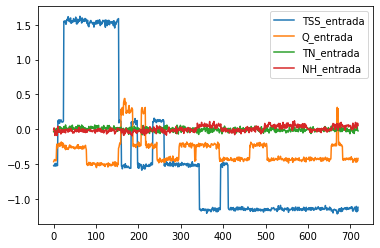

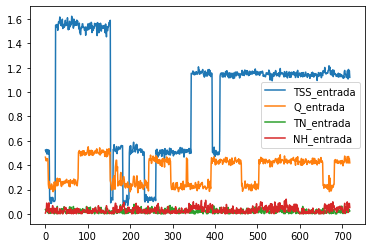

In [32]:
# df_lime_importances['TN'].plot()
df_lime_importances.plot()
df_lime_absolute_importances.plot()

### Análise de Feature Importance geral com LIME ao invés de apenas para ocorrência específica para a BASE DE TREINO

In [33]:
l=[]
for n in range(0,normalized_x_train.shape[0]):
     exp = explainer.explain_instance(normalized_x_train.values[n], rf_model_cv_gs.predict, num_features=X.shape[1])
     a=exp.as_list()
     l.append(a)


df_lime_train_importances = pd.DataFrame()
for sublist in l:
    row_values = {}
    for condition, value in sublist:
        match = re.search(r'([a-zA-Z_]+)', condition)
        if match:
            text = match.group(1)        
            row_values[text] = value
    df_lime_train_importances = df_lime_train_importances.append(row_values, ignore_index=True)

df_lime_train_importances

Intercept 0.3928701154846965
Prediction_local [-1.15187606]
Right: -0.5198939211330649
Intercept 0.4207362355887214
Prediction_local [-1.17806321]
Right: -0.5149192987963574
Intercept 0.4398494614344798
Prediction_local [-1.19264762]
Right: -0.5161571609211375
Intercept 0.3942820224462143
Prediction_local [-1.13438199]
Right: -0.5189236334758605
Intercept 0.41566069783251564
Prediction_local [-1.20947057]
Right: -0.5263974251046926
Intercept 0.41054410667199914
Prediction_local [-1.13314666]
Right: -0.5396115715376106
Intercept 0.40530439141976105
Prediction_local [-1.12086608]
Right: -0.5553735072397591
Intercept 0.4173116212348619
Prediction_local [-1.21806396]
Right: -0.5608313518803265
Intercept 0.4278147851968671
Prediction_local [-1.19161848]
Right: -0.5632582470777113
Intercept 0.4010777861567013
Prediction_local [-1.1515327]
Right: -0.5648395084773227
Intercept 0.41183353971107656
Prediction_local [-1.18187937]
Right: -0.5862354282444631
Intercept 0.42234052374720465
Prediction

In [ ]:
df_lime_train_absolute_importances = df_lime_train_importances.copy()

for i in range(df_lime_importances.shape[1]):
    df_lime_train_absolute_importances.iloc[:,i] = df_lime_train_absolute_importances.iloc[:,i].apply(lambda x: abs(float(x)))
     
df_lime_train_absolute_importances

TSS_entrada  Q_entrada  NH_entrada  TN_entrada
0        1.134261   0.438536    0.010100    0.002071
1        1.151416   0.431793    0.013040    0.014885
2        1.151590   0.446010    0.020134    0.004339
3        1.101114   0.422510    0.004772    0.068660
4        1.165636   0.438492    0.017996    0.005855
...           ...        ...         ...         ...
8037     0.495532   0.403971    0.000855    0.002558
8038     0.505116   0.428102    0.008001    0.025316
8039     0.507927   0.455283    0.019404    0.021582
8040     0.496098   0.472733    0.046117    0.064813
8041     0.480710   0.432631    0.009430    0.011739

[8042 rows x 4 columns]

In [ ]:
df_lime_train_absolute_importances.mean()/df_lime_train_absolute_importances.mean().sum()

TSS_entrada    0.679049
Q_entrada      0.276584
NH_entrada     0.027012
TN_entrada     0.017355
dtype: float64

<Axes: >

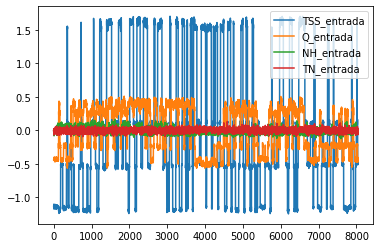

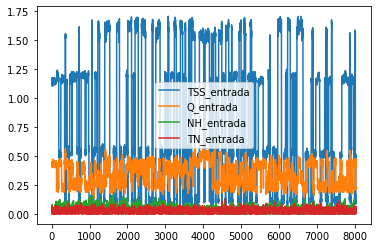

In [ ]:
# df_lime_train_importances['TN'].plot()
df_lime_train_importances.plot()
df_lime_train_absolute_importances.plot()